In [1]:
# importing packages
using SpecialFunctions, Plots

# fin parameters
h = 150.                    # W/m².°C
k = 125.                    # W/m.°C
w = 1.                      # m
δᵦ = 0.04                   # m
L = 0.15                    # m
δx = 0.01                   # m
Tᵦ = 300.                   # °C
Tₑₙᵥ = 25.                  # °C
N = round(Int, w / δx);     # number of RK4 iterations

In [2]:
function solve_ODE(γ₀)
    
    γ = Vector{Float64}()
    θ = Vector{Float64}()
    X = Vector{Float64}()

    push!(γ, γ₀)
    push!(θ, (Tᵦ - Tₑₙᵥ))
    push!(X, w)

    for i in 1:N-1

        k₁ = δx*((-1/X[i])*γ[i] + ((2*h*w/(k*δᵦ*X[i]))+(1/(k*L)))*θ[i])
        l₁ = δx*γ[i]

        k₂ = δx*((-1/(X[i]+δx/2))*(γ[i]+k₁/2) + ((2*h*w/(k*δᵦ*(X[i]+δx/2)))+(1/(k*L)))*(θ[i]+l₁/2))
        l₂ = δx*(γ[i]+k₁/2)

        k₃ = δx*((-1/(X[i]+δx/2))*(γ[i]+k₂/2) + ((2*h*w/(k*δᵦ*(X[i]+δx/2)))+(1/(k*L)))*(θ[i]+l₂/2))
        l₃ = δx*(γ[i]+k₂/2)

        k₄ = δx*((-1/(X[i]+δx))*(γ[i]+k₃) + ((2*h*w/(k*δᵦ*(X[i]+δx)))+(1/(k*L)))*(θ[i]+l₃))
        l₄ = δx*(γ[i]+k₃)
                
        γₙ = γ[i] + (1/6)*(k₁ + 2*k₂ + 2*k₃ + k₄)
        θₙ = θ[i] + (1/6)*(l₁ + 2*l₂ + 2*l₃ + l₄)
        xₙ = X[i] - δx
        
        push!(γ, γₙ)
        push!(θ, θₙ)
        push!(X, xₙ)
               
    end

    return [γ, θ, X]
end

solve_ODE (generic function with 1 method)

In [3]:
# for the problem set last θ must be zero
function Boundary(γ₀)    
    find = solve_ODE(γ₀)
    index = length(find[2])
    return find[2][index]
end

Boundary (generic function with 1 method)

In [4]:
# root finding for f by bisection method
function Bisection(f, a, b; tol=1e-5)
    mean = (a + b) / 2
    while abs(f(mean)) > tol
        if f(mean)*f(a) < 0
            b = mean
        else
            a = mean
        end
        mean = (a + b) / 2
    end
    return mean
end

Bisection (generic function with 1 method)

In [5]:
# converts θ to celsius
function T_convert(θ)
    for j in 1:length(θ[2])
        θ[2][j] += Tₑₙᵥ
    end
    return θ[2]
end

T_convert (generic function with 1 method)

In [6]:
# calculating boundary condition
γ₀ = Bisection(Boundary, -5000., 0.)


-2342.497254257978

In [7]:
# solving ODE system with γ₀ condition
Solution = solve_ODE(γ₀)
Solved = T_convert(Solution);

In [8]:
function Analytic(f, vec)
    Result = Vector{Float64}()
    for i in 1:length(vec)
        T = f(vec[i]) + Tₑₙᵥ
        push!(Result, T)
    end
    return Result
end

Analytic (generic function with 1 method)

In [9]:
# Modified Bessel Function with SpecialFunctions package
θᵦ = (Tᵦ - Tₑₙᵥ)
m = ((2*h)/(k*δᵦ))^0.5
I₀(x) = θᵦ*((besseli(0, 2*m*((x*w)^0.5)))/(besseli(0, 2*m*w)))
Bessel = Analytic(I₀, Solution[3]);

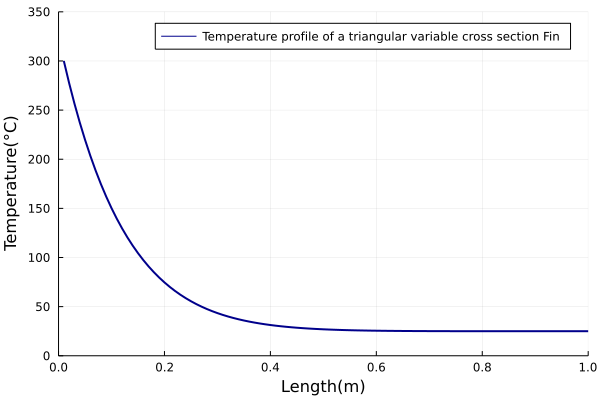

In [10]:
# Ploting Analytical vs Numerical Solution 
L = "Length(m)"
T = "Temperature(°C)"
lb2 = "Temperature profile of a triangular variable cross section Fin"

plot(reverse(Solution[3]),Solution[2],ylim=(0,350),xlim=(0,1),xl=L,yl=T,label=lb2,lw=:2,c=:darkblue)


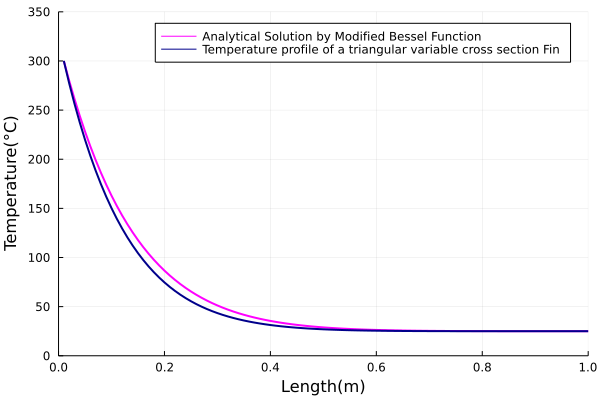

In [11]:
# Ploting Analytical vs Numerical Solution 
L = "Length(m)"
T = "Temperature(°C)"
lb1 = "Analytical Solution by Modified Bessel Function"
lb2 = "Temperature profile of a triangular variable cross section Fin"

plot(reverse(Solution[3]),Bessel, xlabel =L, ylabel=T, ylim=(0,350),xlim=(0,1),xl=L,yl=T,label=lb1,lw=:2,c=:magenta)
plot!(reverse(Solution[3]),Solution[2],label=lb2,lw=:2,c=:darkblue)